## Results of the Mode Imputation Data
<hr/>

</h3>We considered the data which has mode imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df1 = pd.read_csv("../../../../main/sub_data/single_variant/mode/sin_ndlc_psp_mode.csv",index_col='Date',parse_dates=True)
# Reading the First Difference Data
df2 = pd.read_csv("../../../../main/sub_data/single_variant/mode/sin_ndlc_psp_mode_diff1.csv",index_col='Date',parse_dates=True)
# Reading the Second Difference Data
df3 = pd.read_csv("../../../../main/sub_data/single_variant/mode/sin_ndlc_psp_mode_diff2.csv",index_col='Date',parse_dates=True)

In [3]:
df1 = df1.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)
df1

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-05-27,5051.0
2023-05-28,4780.0
2023-05-29,4782.0


In [4]:
df2.head()

,Max.Demand met during the day (MW)
Date,
2013-04-02,258.0
2013-04-03,-43.0
2013-04-04,134.0
2013-04-05,35.0
2013-04-06,-7.0


In [5]:
df3.head()

,Max.Demand met during the day (MW)
Date,
2013-04-03,-301.0
2013-04-04,177.0
2013-04-05,-99.0
2013-04-06,-42.0
2013-04-07,-91.0


## We first Divide our data into train and Test data

In [6]:
df1_train = df1.loc[:'2023-04-30']
df1_test = df1.loc['2023-05-01':]
df1_train.to_csv("../../../../main/sub_data/single_variant/mode/train/train_mode.csv")
df1_test.to_csv("../../../../main/sub_data/single_variant/mode/test/test_mode.csv")

## AR(1) model according to the ACF and PACF plots

In [7]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [8]:
ar1_model = ARIMA(df1_train,order=(1,0,0))
ar1_results = ar1_model.fit()
print(ar1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 0, 0)   Log Likelihood              -26422.757
Date:                                Sat, 15 Jul 2023   AIC                          52851.514
Time:                                        09:34:39   BIC                          52870.148
Sample:                                    04-01-2013   HQIC                         52858.147
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.7042    101.776     42.551      0.000    4131.227    4530.181
ar.

In [9]:
get_MAPE_MAE_test(df1_test,ar1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar1_results)

The MAPE Score is :  19.025743881303807
The MAE Score is : 205.1280033390888
------------------------------------------------------------
The MAPE Score is :  25.966298741403858
The MAE Score is : 205.1280033390888


(25.966298741403858, 205.1280033390888)

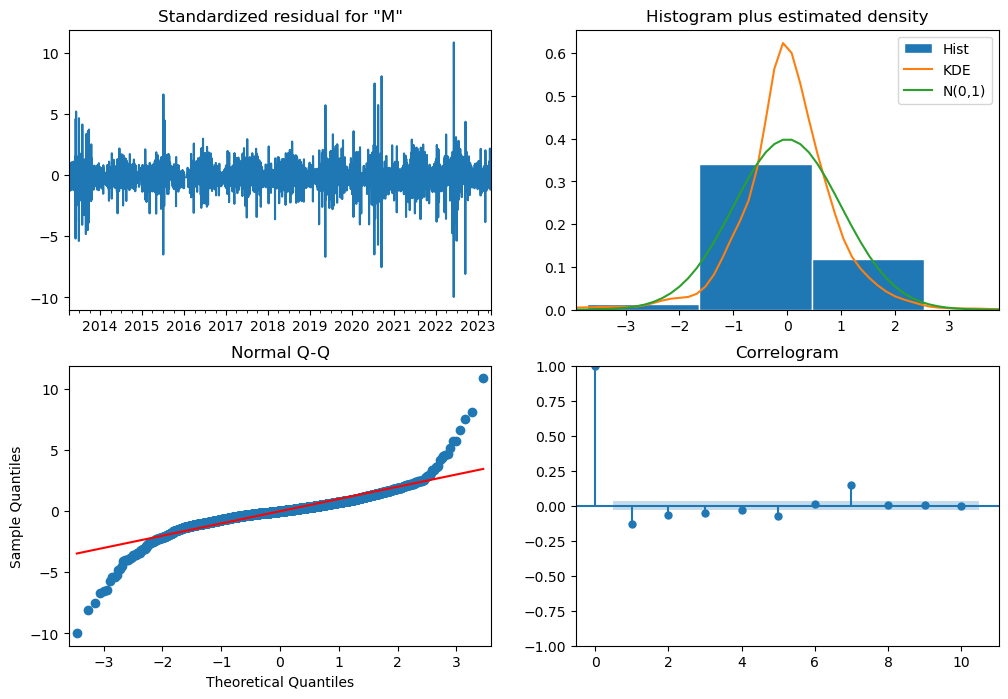

In [10]:
ar1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [11]:
ar2_model = ARIMA(df1_train,order=(2,0,0))
ar2_results = ar2_model.fit()
print(ar2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(2, 0, 0)   Log Likelihood              -26386.369
Date:                                Sat, 15 Jul 2023   AIC                          52780.739
Time:                                        09:34:43   BIC                          52805.583
Sample:                                    04-01-2013   HQIC                         52789.583
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.7042    129.231     33.511      0.000    4077.416    4583.992
ar.

In [12]:
get_MAPE_MAE_test(df1_test,ar2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar2_results)

The MAPE Score is :  19.256679403073424
The MAE Score is : 206.033569770963
------------------------------------------------------------
The MAPE Score is :  25.977295478943805
The MAE Score is : 206.033569770963


(25.977295478943805, 206.033569770963)

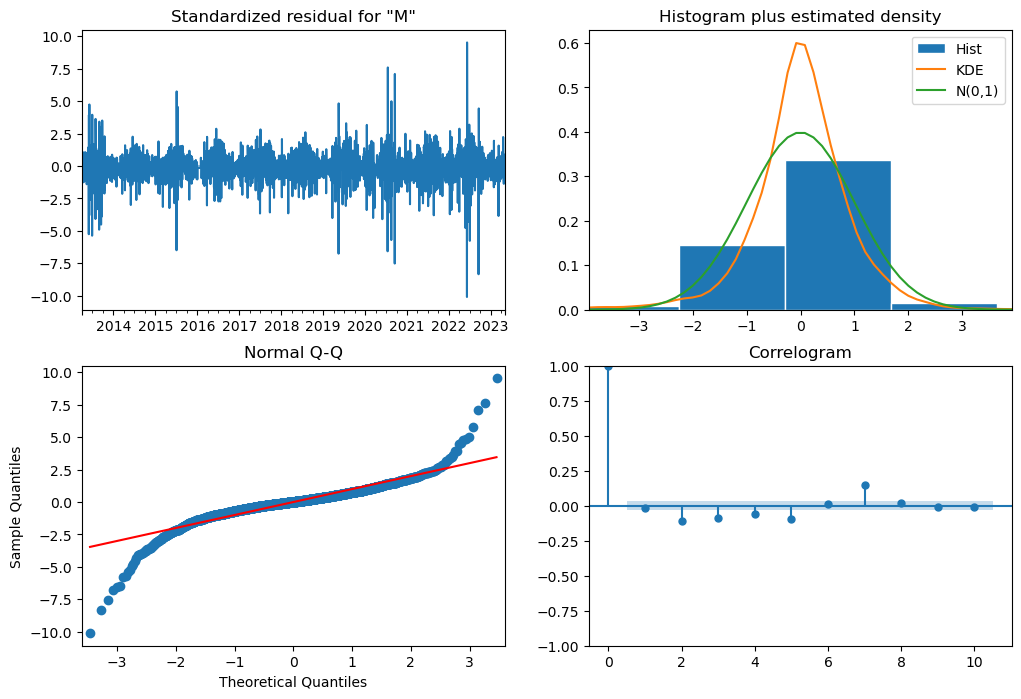

In [13]:
ar2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [14]:
ar3_model = ARIMA(df1_train,order=(1,1,0))
ar3_results = ar3_model.fit()
print(ar3_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 1, 0)   Log Likelihood              -26413.716
Date:                                Sat, 15 Jul 2023   AIC                          52831.433
Time:                                        09:34:45   BIC                          52843.854
Sample:                                    04-01-2013   HQIC                         52835.854
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1620      0.007    -21.995      0.000      -0.176      -0.148
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.531733870317915
The MAE Score is : 207.21063995510696
------------------------------------------------------------
The MAPE Score is :  26.56695089898176
The MAE Score is : 207.21063995510696


(26.56695089898176, 207.21063995510696)

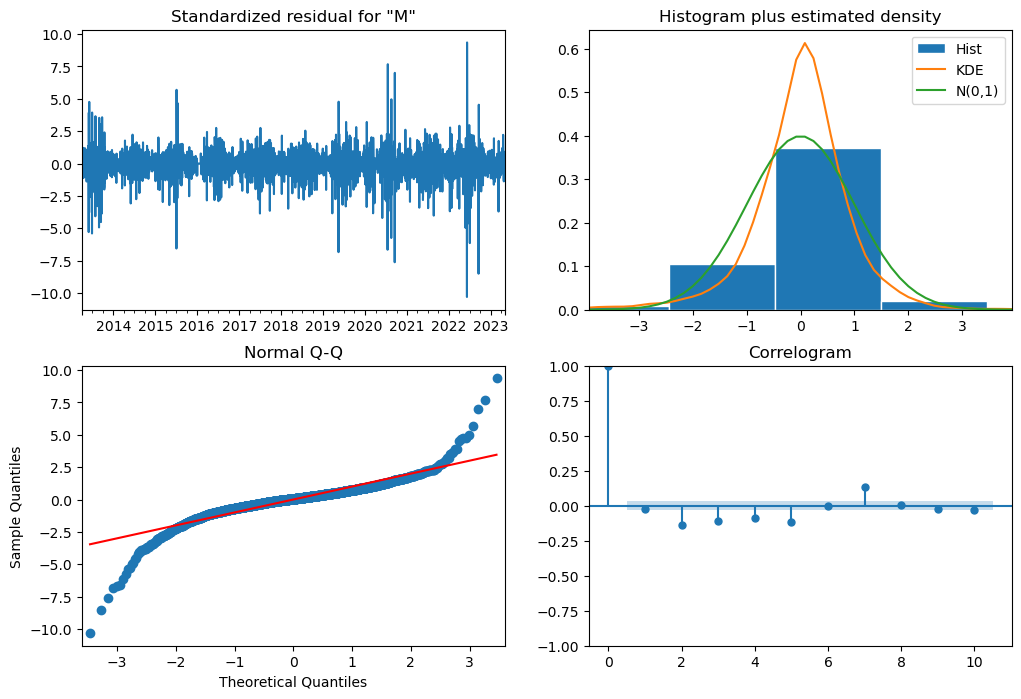

In [16]:
ar3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [17]:
ar4_model = ARIMA(df1,order=(1,2,0))
ar4_results = ar4_model.fit()
print(ar4_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3713
Model:                                 ARIMA(1, 2, 0)   Log Likelihood              -27628.820
Date:                                Sat, 15 Jul 2023   AIC                          55261.639
Time:                                        09:34:47   BIC                          55274.078
Sample:                                    04-01-2013   HQIC                         55266.065
                                         - 05-31-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5289      0.006    -83.829      0.000      -0.541      -0.517
sig

In [18]:
get_MAPE_MAE_test(df1_test,ar4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar4_results)

The MAPE Score is :  85.08811529159722
The MAE Score is : 269.2902173098643
------------------------------------------------------------
The MAPE Score is :  27.498421809567603
The MAE Score is : 269.2902173098643


(27.498421809567603, 269.2902173098643)

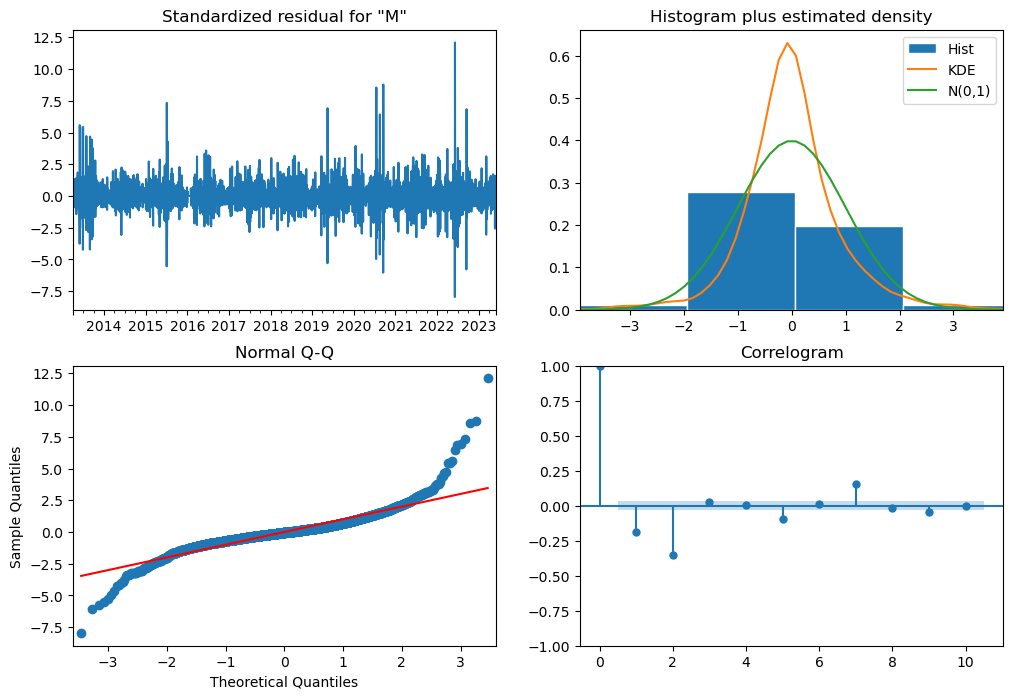

In [19]:
ar4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [20]:
ma1_model = ARIMA(df1_train,order=(0,0,1))
ma1_results = ma1_model.fit()
print(ma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 0, 1)   Log Likelihood              -28921.802
Date:                                Sat, 15 Jul 2023   AIC                          57849.604
Time:                                        09:34:52   BIC                          57868.238
Sample:                                    04-01-2013   HQIC                         57856.237
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.6508     19.756    219.204      0.000    4291.929    4369.372
ma.

In [21]:
get_MAPE_MAE_test(df1_test,ma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma1_results)

The MAPE Score is :  16.796637910326986
The MAE Score is : 511.17339492629424
------------------------------------------------------------
The MAPE Score is :  21.587342370348992
The MAE Score is : 511.17339492629424


(21.587342370348992, 511.17339492629424)

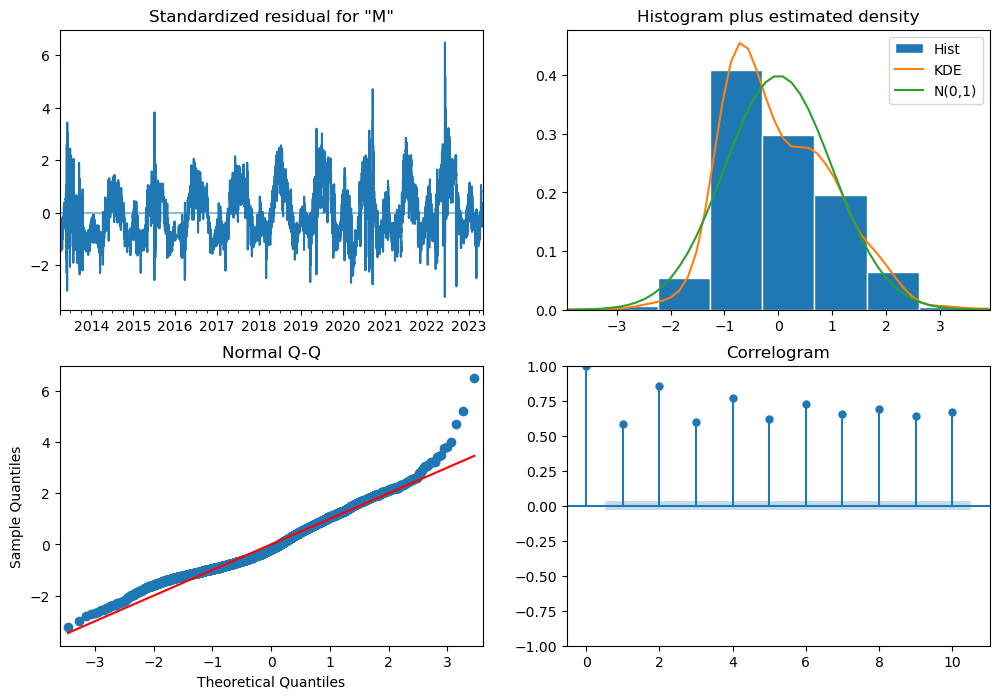

In [22]:
ma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [23]:
ma2_model = ARIMA(df1_train,order=(0,1,1))
ma2_results = ma2_model.fit()
print(ma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 1, 1)   Log Likelihood              -26395.908
Date:                                Sat, 15 Jul 2023   AIC                          52795.815
Time:                                        09:34:54   BIC                          52808.237
Sample:                                    04-01-2013   HQIC                         52800.237
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2285      0.008    -30.248      0.000      -0.243      -0.214
sig

In [24]:
get_MAPE_MAE_test(df1_test,ma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma2_results)

The MAPE Score is :  21.013065037662138
The MAE Score is : 208.60960540859423
------------------------------------------------------------
The MAPE Score is :  26.51324645344507
The MAE Score is : 208.60960540859423


(26.51324645344507, 208.60960540859423)

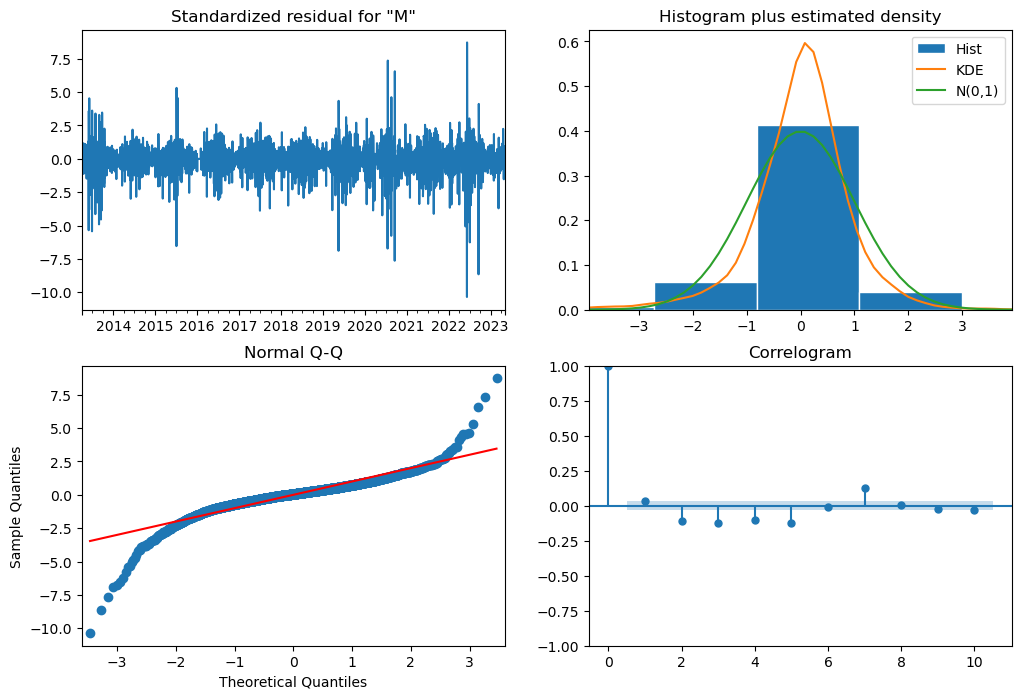

In [25]:
ma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [26]:
ma3_model = ARIMA(df1_train,order=(0,2,1))
ma3_results = ma3_model.fit()
print(ma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 2, 1)   Log Likelihood              -26460.873
Date:                                Sat, 15 Jul 2023   AIC                          52925.747
Time:                                        09:34:58   BIC                          52938.168
Sample:                                    04-01-2013   HQIC                         52930.169
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.011    -87.845      0.000      -1.022      -0.977
sig

In [27]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.531733870317915
The MAE Score is : 207.21063995510696
------------------------------------------------------------
The MAPE Score is :  26.56695089898176
The MAE Score is : 207.21063995510696


(26.56695089898176, 207.21063995510696)

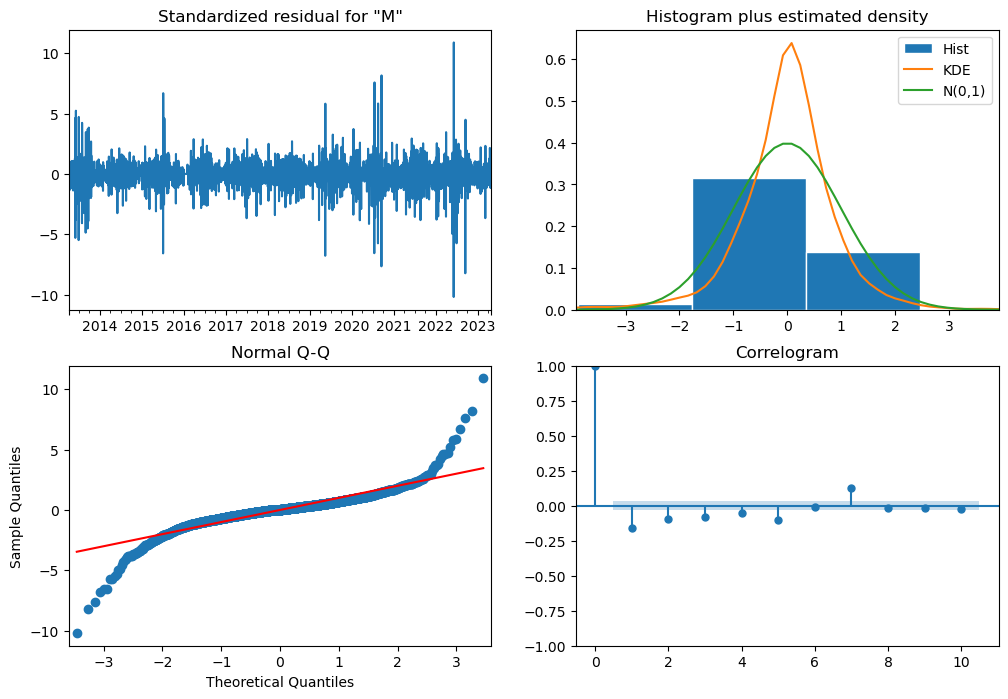

In [28]:
ma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

## ARMA Models through AIC and BIC scores

In [29]:
# arma_results1 = []
# for p in range(10):
#     for q in range(10):
#         try:
#             results = ARIMA(df1,order=(p,0,q)).fit()
#             arma_results1.append((p,q,results.aic,results.bic))
#         except:
#             arma_results1.append((p,q,None,None))
arma_results1 = pd.read_csv("arma_results1.csv")

In [30]:
arma_results1 = pd.DataFrame(arma_results1,columns=['p','q','AIC','BIC'])
arma_results1.sort_values('AIC')

,p,q,AIC,BIC
98,9,8,52811.138228,52929.310542
99,9,9,52842.178391,52966.570300
89,8,9,52846.342608,52964.514921
78,7,8,52853.166074,52958.899197
88,8,8,52853.740113,52965.692831
...,...,...,...,...
4,0,4,54854.397197,54891.714770
3,0,3,55631.720773,55662.818750
2,0,2,56439.178847,56464.057229
1,0,1,58336.949309,58355.608096


In [31]:
arma_results1.to_csv("arma_results1.csv")
arma_results1.sort_values('BIC')

,p,q,AIC,BIC
98,9,8,52811.138228,52929.310542
78,7,8,52853.166074,52958.899197
89,8,9,52846.342608,52964.514921
88,8,8,52853.740113,52965.692831
99,9,9,52842.178391,52966.570300
...,...,...,...,...
4,0,4,54854.397197,54891.714770
3,0,3,55631.720773,55662.818750
2,0,2,56439.178847,56464.057229
1,0,1,58336.949309,58355.608096


In [32]:
arma1_results = ARIMA(df1_train,order=(9,0,8)).fit()
print(arma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 0, 8)   Log Likelihood              -26159.654
Date:                                Sat, 15 Jul 2023   AIC                          52357.307
Time:                                        09:38:42   BIC                          52475.320
Sample:                                    04-01-2013   HQIC                         52399.316
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.7042   1155.058      3.749      0.000    2066.832    6594.576
ar.

In [33]:
get_MAPE_MAE_test(df1_test,arma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma1_results)

The MAPE Score is :  18.004437429119356
The MAE Score is : 188.9014599230906
------------------------------------------------------------
The MAPE Score is :  26.273712002905047
The MAE Score is : 188.9014599230906


(26.273712002905047, 188.9014599230906)

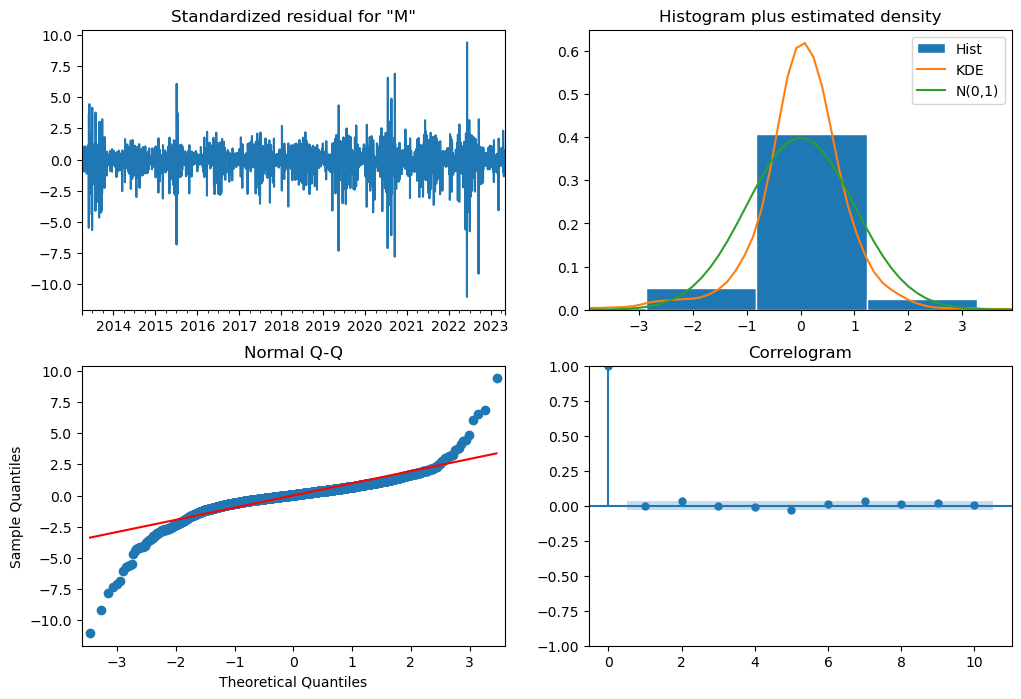

In [34]:
arma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [35]:
arma2_results = ARIMA(df1_train,order=(9,1,8)).fit()
print(arma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 1, 8)   Log Likelihood              -26327.644
Date:                                Sat, 15 Jul 2023   AIC                          52691.287
Time:                                        09:43:22   BIC                          52803.084
Sample:                                    04-01-2013   HQIC                         52731.084
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4081      0.044      9.325      0.000       0.322       0.494
ar.

In [36]:
get_MAPE_MAE_test(df1_test,arma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma2_results)

The MAPE Score is :  22.428832073892686
The MAE Score is : 200.5566618921055
------------------------------------------------------------
The MAPE Score is :  26.522423805426836
The MAE Score is : 200.5566618921055


(26.522423805426836, 200.5566618921055)

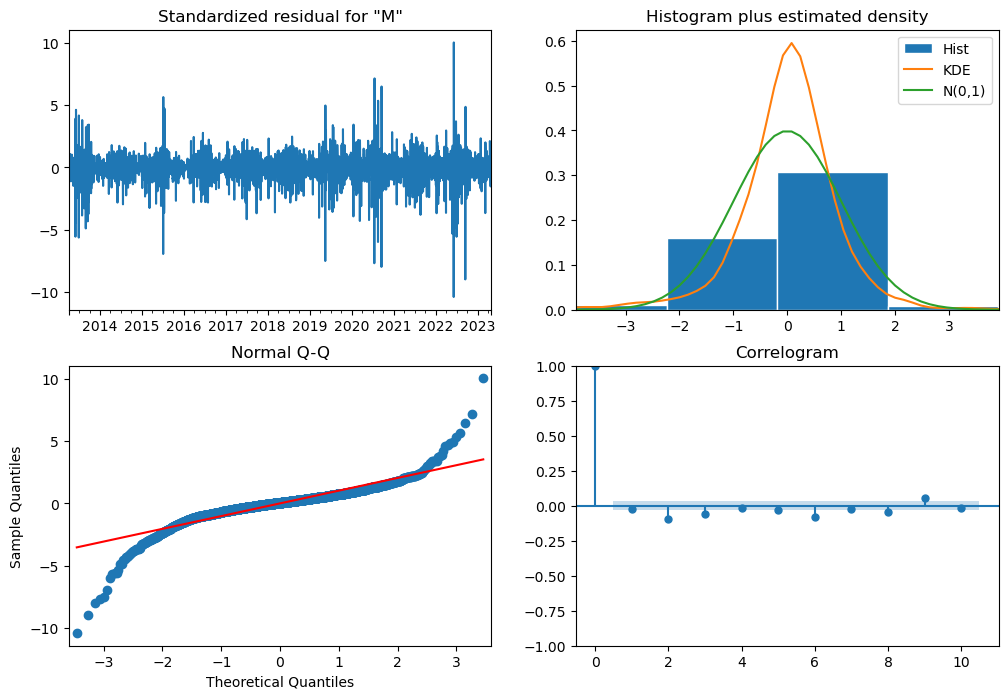

In [37]:
arma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [38]:
arma3_results = ARIMA(df1_train,order=(9,0,9)).fit()
print(arma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 0, 9)   Log Likelihood              -26168.485
Date:                                Sat, 15 Jul 2023   AIC                          52376.970
Time:                                        09:48:17   BIC                          52501.194
Sample:                                    04-01-2013   HQIC                         52421.190
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.7042    363.615     11.910      0.000    3618.032    5043.377
ar.

In [39]:
get_MAPE_MAE_test(df1_test,arma3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma3_results)

The MAPE Score is :  18.237296447886422
The MAE Score is : 192.1344319591613
------------------------------------------------------------
The MAPE Score is :  26.157819552424492
The MAE Score is : 192.1344319591613


(26.157819552424492, 192.1344319591613)

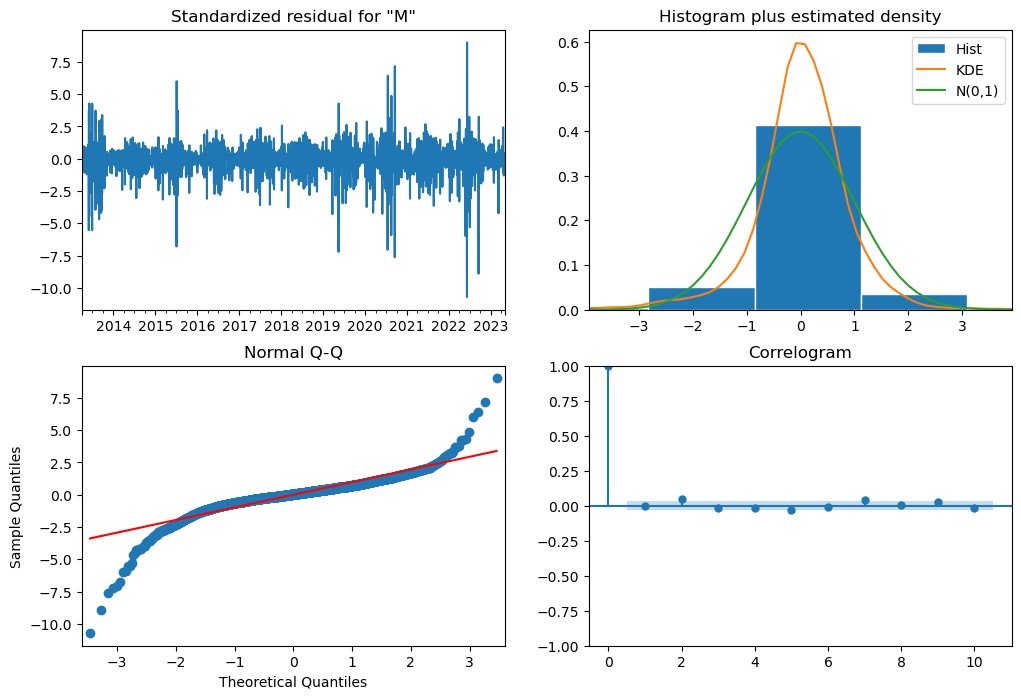

In [40]:
arma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [41]:
arma4_results = ARIMA(df1_train,order=(9,1,9)).fit()
print(arma4_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 1, 9)   Log Likelihood              -26159.292
Date:                                Sat, 15 Jul 2023   AIC                          52356.583
Time:                                        09:52:34   BIC                          52474.591
Sample:                                    04-01-2013   HQIC                         52398.591
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2110      0.401     -0.526      0.599      -0.997       0.575
ar.

In [42]:
get_MAPE_MAE_test(df1_test,arma4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma4_results)

The MAPE Score is :  16.65121710358922
The MAE Score is : 189.27515852446814
------------------------------------------------------------
The MAPE Score is :  26.512732642226453
The MAE Score is : 189.27515852446814


(26.512732642226453, 189.27515852446814)

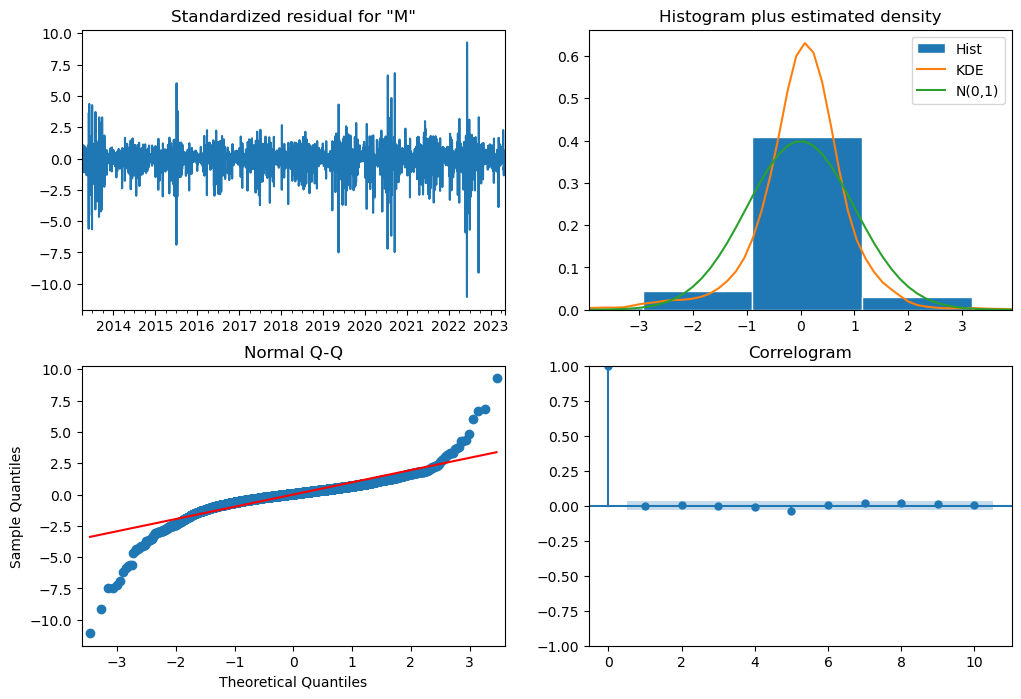

In [43]:
arma4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [44]:
arma5_results = ARIMA(df1_train,order=(8,0,9)).fit()
print(arma5_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 0, 9)   Log Likelihood              -26187.001
Date:                                Sat, 15 Jul 2023   AIC                          52412.001
Time:                                        09:57:02   BIC                          52530.014
Sample:                                    04-01-2013   HQIC                         52454.010
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4330.7042    774.024      5.595      0.000    2813.645    5847.763
ar.

In [45]:
get_MAPE_MAE_test(df1_test,arma5_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma5_results)

The MAPE Score is :  18.34314594559659
The MAE Score is : 193.03684288964942
------------------------------------------------------------
The MAPE Score is :  26.220593547496133
The MAE Score is : 193.03684288964942


(26.220593547496133, 193.03684288964942)

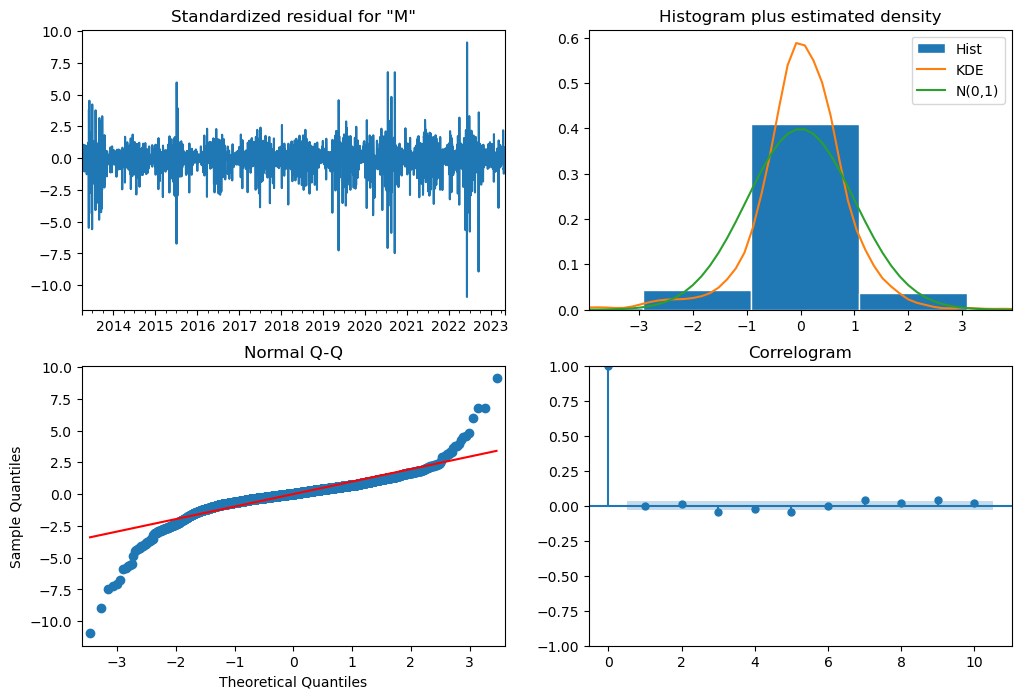

In [46]:
arma5_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [47]:
arma6_results = ARIMA(df1_train,order=(8,1,9)).fit()
print(arma6_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 1, 9)   Log Likelihood              -26271.288
Date:                                Sat, 15 Jul 2023   AIC                          52578.576
Time:                                        10:00:39   BIC                          52690.373
Sample:                                    04-01-2013   HQIC                         52618.373
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3253      0.377     -0.863      0.388      -1.064       0.413
ar.

In [48]:
get_MAPE_MAE_test(df1_test,arma6_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma6_results)

The MAPE Score is :  18.698436581990045
The MAE Score is : 201.60599882387007
------------------------------------------------------------
The MAPE Score is :  26.342983849943707
The MAE Score is : 201.60599882387007


(26.342983849943707, 201.60599882387007)

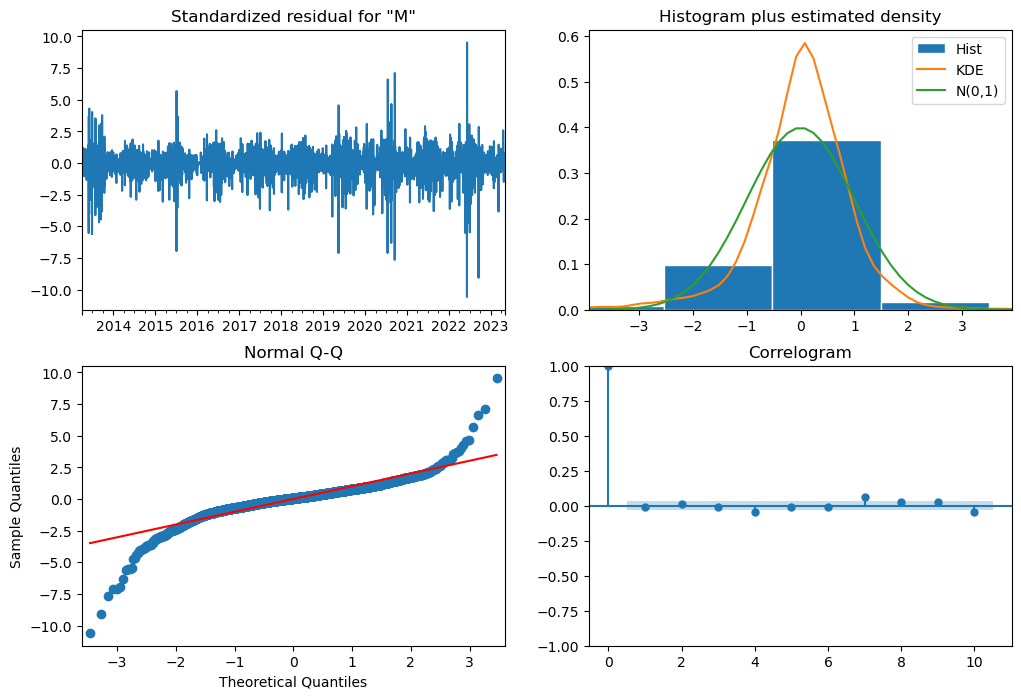

In [49]:
arma6_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [50]:
# Create auto_arima model
model1 = pm.auto_arima(df1_train,
                      seasonal=True, 
                      error_action='ignore',
                      suppress_warnings=True)

# Create auto_arima model
model2 = pm.auto_arima(df1_train,
                      seasonal=False, 
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())
print(model2.summary())



/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  ret

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3682
Model:               SARIMAX(3, 1, 4)   Log Likelihood              -26244.485
Date:                Sat, 15 Jul 2023   AIC                          52506.970
Time:                        10:29:07   BIC                          52562.869
Sample:                    04-01-2013   HQIC                         52526.869
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3064      0.523      0.586      0.558      -0.718       1.331
ar.L1          1.9467      0.037     52.651      0.000       1.874       2.019
ar.L2         -1.8687      0.046    -40.909      0.0

In [51]:
model1 = ARIMA(df1_train,order=(3,1,4)).fit()

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


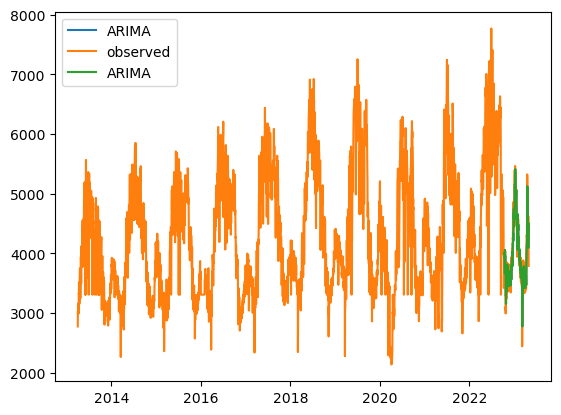

In [52]:
# Create ARIMA mean forecast
arima_pred = model1.get_prediction(start=-200)
arima_mean = arima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.plot(df1_train.index,df1_train["Max.Demand met during the day (MW)"], label='observed')
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.legend()
plt.show()

In [53]:
get_MAPE_MAE_test(df1_test,model1)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,model1)

The MAPE Score is :  18.401033800831396
The MAE Score is : 198.80071119503967
------------------------------------------------------------
The MAPE Score is :  26.340046666594752
The MAE Score is : 198.80071119503967


(26.340046666594752, 198.80071119503967)